In [1]:
import re 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
import os 
import sys
import datetime 
import itertools 
import math

In [3]:
import pandas_datareader.data as web
import warnings
import matplotlib as mpl



In [4]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 
import statsmodels.api as sm
import scipy.stats as scs 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
from ipywidgets import interactive, widgets , RadioButtons , ToggleButtons , Select , FloatSlider , FloatProgress

In [6]:
from IPython.display import set_matplotlib_formats , Image 

In [7]:
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

In [8]:
data = pd.read_csv('passengers.csv',header=0,sep=';',parse_dates=True)

# Time Series Forecasting with Prophet

Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers

orecasting in the domain of Prophet is a curve-fitting task. The underlying model has an additive form

y(t) = d(t) + s(t) + h(t) + epsilon_t

where d(t) denotes a trend function modeling non-periodic changes,s(t) denotes seasonality modeling periodic changes and h(t) representing the effects of holidays. This model assumes time as its only regressor, however, linear and non-linear transformations are included if it increases the models fit. 

In [9]:
from fbprophet import Prophet 

In [10]:
data.head()

,month,n_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
data['ds']= data['month']
data['y']= pd.DataFrame(data['n_passengers'])
data.pop('month')
data.pop('n_passengers')
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data['y']=pd.DataFrame(np.log(data['y']))
data.head()

,ds,y
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791


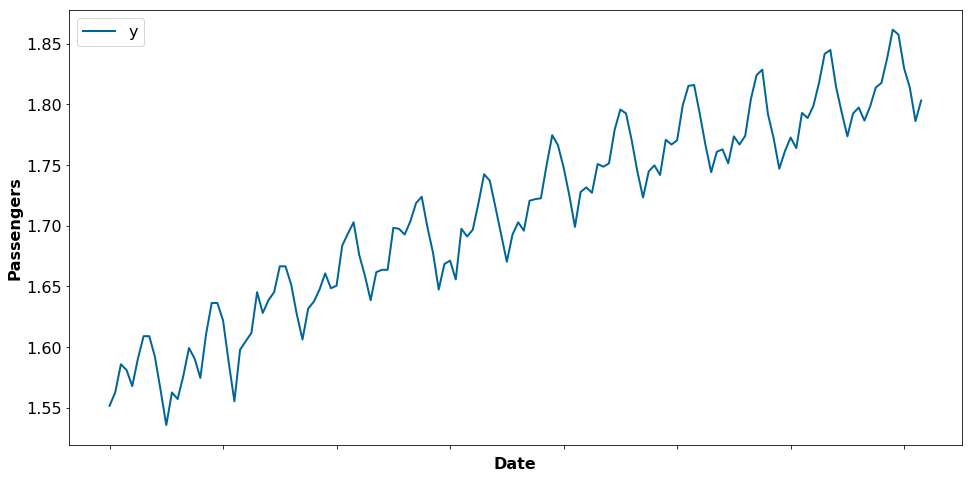

In [13]:
data['y'] = pd.DataFrame(np.log(data['y']))

ax = data.set_index('ds').plot(color='#006699');
ax.set_ylabel('Passengers');
ax.set_xlabel('Date');
plt.show()

In [14]:
data_train = data[:120]
data_test =data[120:]

In [15]:
mdl =Prophet(interval_width=0.95)

In [16]:
mdl.fit(data_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [17]:
future = mdl.make_future_dataframe(periods=24, freq ='MS')

In [18]:
future.tail()

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01


In [19]:
forecast =mdl.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,1.841166,1.812166,1.870413
140,1960-09-01,1.815812,1.785513,1.849180
141,1960-10-01,1.792775,1.759262,1.824915
142,1960-11-01,1.769075,1.735035,1.803632
143,1960-12-01,1.790494,1.754192,1.830147


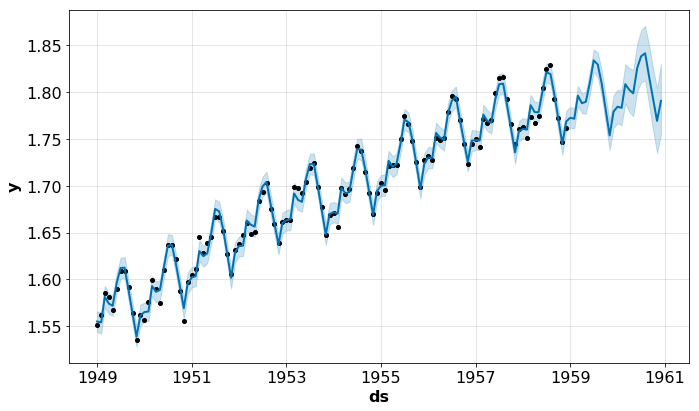

In [20]:
mdl.plot(forecast);
plt.show()

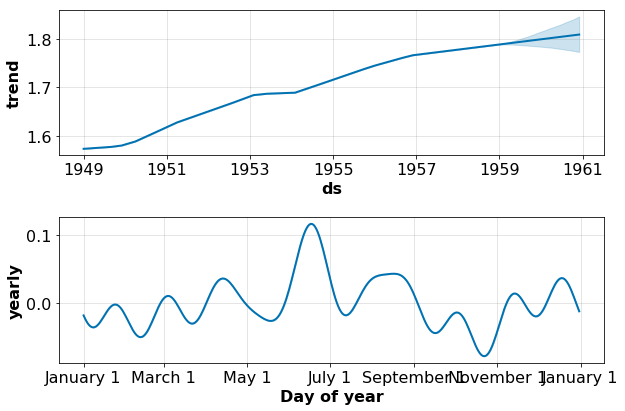

In [21]:
mdl.plot_components(forecast);
plt.show()

In [22]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
139,1960-08-01,1.805247,1.777641,1.833739,1.812166,1.870413,0.035919,0.035919,0.035919,0.0,0.0,0.0,0.035919,0.035919,0.035919,1.841166
140,1960-09-01,1.806151,1.776839,1.836642,1.785513,1.849180,0.009661,0.009661,0.009661,0.0,0.0,0.0,0.009661,0.009661,0.009661,1.815812
141,1960-10-01,1.807026,1.775558,1.839021,1.759262,1.824915,-0.014252,-0.014252,-0.014252,0.0,0.0,0.0,-0.014252,-0.014252,-0.014252,1.792775
142,1960-11-01,1.807930,1.774263,1.842589,1.735035,1.803632,-0.038855,-0.038855,-0.038855,0.0,0.0,0.0,-0.038855,-0.038855,-0.038855,1.769075
143,1960-12-01,1.808805,1.772999,1.846022,1.754192,1.830147,-0.018312,-0.018312,-0.018312,0.0,0.0,0.0,-0.018312,-0.018312,-0.018312,1.790494


In [23]:
y_hat = np.exp(forecast['yhat'][120:])
y_hat_lower = np.exp(forecast['yhat_lower'][120:])
y_hat_upper = np.exp(forecast['yhat_upper'][120:])
y_true = np.exp(data_test['y'])

mse =((y_hat - y_true)**2).mean()
print('Predication quality: {:.2f} MSE ({:.2F}RMSE)'.format(mse,math.sqrt(mse)))

Predication quality: 0.01 MSE (0.08RMSE)


In [24]:
months = pd.date_range(start='1951-01-01', end='1960-12-01', freq='MS')

y_hat_plot = pd.DataFrame(y_hat)
y_hat_lower_plot = pd.DataFrame(y_hat_lower)
y_hat_upper_plot = pd.DataFrame(y_hat_upper)
y_true_plot = pd.DataFrame(np.exp(data['y']))

In [25]:
pd.date_range(start='1958-12-01',end='1960-12-01',freq='MS')

DatetimeIndex(['1958-12-01', '1959-01-01', '1959-02-01', '1959-03-01',
               '1959-04-01', '1959-05-01', '1959-06-01', '1959-07-01',
               '1959-08-01', '1959-09-01', '1959-10-01', '1959-11-01',
               '1959-12-01', '1960-01-01', '1960-02-01', '1960-03-01',
               '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01',
               '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01',
               '1960-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [26]:
y_hat_upper

120    5.952393
121    5.946498
122    6.088366
123    6.040400
124    6.049905
125    6.180028
126    6.330101
127    6.309135
128    6.187779
129    6.024146
130    5.864432
131    6.027218
132    6.063917
133    6.061284
134    6.231311
135    6.205604
136    6.193661
137    6.371412
138    6.460251
139    6.490977
140    6.354608
141    6.202268
142    6.071658
143    6.234806
Name: yhat_upper, dtype: float64

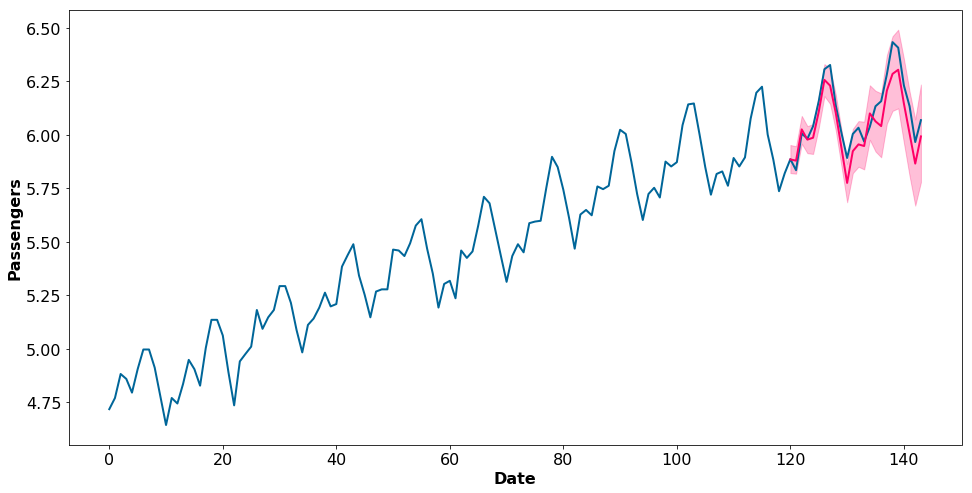

In [27]:
plt.plot(y_true_plot ,label='Original', color='#006699');
plt.plot(y_hat_plot, color='#ff0066', label='Forecast');
plt.fill_between(y_true_plot[120:].index, y_hat_upper, y_hat_lower, color='#ff0066', alpha=0.25)
plt.ylabel('Passengers');
plt.xlabel('Date');
plt.show()